In [4]:
import numpy as np
import pandas as pd 
import cv2 
import PIL 
import pytesseract 

In [8]:
img_cv = cv2.imread('C:/Users/tolga/business_card_/Selected/052.jpeg')

cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
type(img_cv)

numpy.ndarray

In [10]:
img_pl = PIL.Image.open('C:/Users/tolga/business_card_/Selected/052.jpeg')

In [11]:
type(img_pl)

PIL.JpegImagePlugin.JpegImageFile

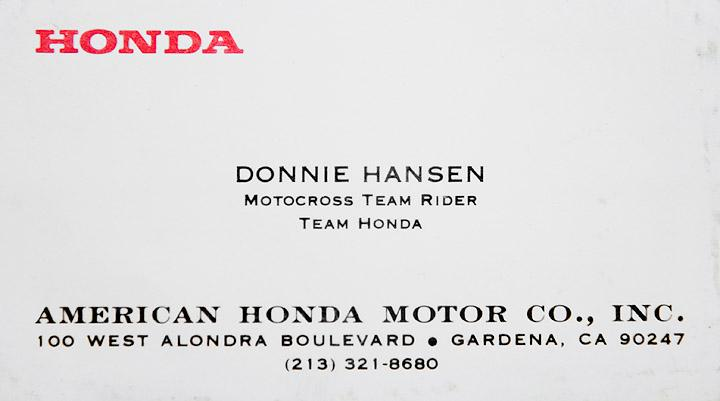

In [12]:
img_pl

### Text from Image

In [13]:
text_cv = pytesseract.image_to_string(img_cv)

In [14]:
print(text_cv)

HONDA

DONNIE HANSEN
MOTOCROSS TEAM RIDER
TEAM HONDA

AMERICAN HONDA MOTOR CO., INC.
100 WEST ALONDRA BOULEVARD e GARDENA, CA 90247
(213) 321-8680



In [15]:
text_pl = pytesseract.image_to_string(img_pl)

In [16]:
print(text_pl)

HONDA

DONNIE HANSEN
MOTOCROSS TEAM RIDER
TEAM HONDA

AMERICAN HONDA MOTOR CO., INC.
100 WEST ALONDRA BOULEVARD e GARDENA, CA 90247
(213) 321-8680



### Image to Data

In [17]:
data = pytesseract.image_to_data(img_cv)

In [18]:
#data.split('\n')
dataList = list(map(lambda x: x.split('\t'),data.split('\n')))
df = pd.DataFrame(dataList[1:],columns=dataList[0])

In [19]:
df.head(10)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,720,401,-1,
1,2,1,1,0,0,0,36,29,207,25,-1,
2,3,1,1,1,0,0,36,29,207,25,-1,
3,4,1,1,1,1,0,36,29,207,25,-1,
4,5,1,1,1,1,1,36,29,207,25,95,HONDA
5,2,1,2,0,0,0,237,166,246,63,-1,
6,3,1,2,1,0,0,237,166,246,63,-1,
7,4,1,2,1,1,0,237,166,246,16,-1,
8,5,1,2,1,1,1,237,166,112,16,96,DONNIE
9,5,1,2,1,1,2,364,166,119,16,96,HANSEN


In [20]:
df.dropna(inplace=True) # drop the missing in rows
col_int = ['level','page_num','block_num','par_num','line_num','word_num','left','top','width','height','conf']
df[col_int] = df[col_int].astype(int)

In [21]:
df.dtypes

level         int32
page_num      int32
block_num     int32
par_num       int32
line_num      int32
word_num      int32
left          int32
top           int32
width         int32
height        int32
conf          int32
text         object
dtype: object

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   level      37 non-null     int32 
 1   page_num   37 non-null     int32 
 2   block_num  37 non-null     int32 
 3   par_num    37 non-null     int32 
 4   line_num   37 non-null     int32 
 5   word_num   37 non-null     int32 
 6   left       37 non-null     int32 
 7   top        37 non-null     int32 
 8   width      37 non-null     int32 
 9   height     37 non-null     int32 
 10  conf       37 non-null     int32 
 11  text       37 non-null     object
dtypes: int32(11), object(1)
memory usage: 2.2+ KB


In [27]:
image = img_cv.copy()
level = 'word'
for l,x,y,w,h,c,txt in df[['level','left','top','width','height','conf','text']].values:
    print(l,x,y,w,h,c)

1 0 0 720 401 -1
2 36 29 207 25 -1
3 36 29 207 25 -1
4 36 29 207 25 -1
5 36 29 207 25 95
2 237 166 246 63 -1
3 237 166 246 63 -1
4 237 166 246 16 -1
5 237 166 112 16 96
5 364 166 119 16 96
4 245 194 231 12 -1
5 245 195 108 11 96
5 362 194 48 11 96
5 422 194 54 11 96
4 299 218 123 11 -1
5 299 218 49 11 94
5 359 218 63 11 96
2 35 304 649 67 -1
3 35 304 649 67 -1
4 35 304 648 22 -1
5 35 307 184 17 96
5 240 306 122 17 96
5 383 305 123 18 92
5 527 305 66 21 79
5 612 304 71 17 94
4 39 333 645 14 -1
5 39 335 35 12 96
5 87 335 61 11 93
5 161 335 106 11 90
5 282 335 132 11 92
5 428 337 9 9 92
5 452 334 112 13 92
5 579 333 28 12 96
5 620 333 64 12 96
4 285 358 153 13 -1
5 285 358 50 13 96
5 345 358 93 12 94


In [24]:
image = img_cv.copy()
level = 'word'
for l,x,y,w,h,c,txt in df[['level','left','top','width','height','conf','text']].values:
    #print(l,x,y,w,h,c)
    if level == 'page':
        if l == 1:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,0),2)
        else:
            continue
            
    elif level == 'block':
        if l == 2:
            cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
        else:
            continue
    
    elif level == 'para':
        if l == 3:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        else:
            continue
    
    elif level == 'line':
        if l == 4:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)
        else:
            continue
            
    elif level == 'word':
        if l == 5:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
            cv2.putText(image,txt,(x,y),cv2.FONT_HERSHEY_PLAIN,1,(255,0,0),2)
        else:
            continue
            
cv2.imshow("bounding box",image)
cv2.waitKey()
cv2.destroyAllWindows()